# Object Detection Using YOLO v5

### Levering YOLO v5 for Solar Panel Damage Detection

Aim: This experiment aims to utilise the capabilities of YOLOv5, a single-shot and real-time object detector for the detection of solar panel damage in thermal images.

The dataset consists of thermal images depicting solar panels. These images are labelled for object detection into five classes, namely 'Cell', 'Cell-Multi', 'No-Anomaly', 'Shadowing', and 'Unclassified'. 
The dataset is partitioned into training, validation and testing sets, comprising 1167, 250 and 250 images respectively.



Below are the steps performed:
    1. Cloning the gitHub repository
    2. Installing required libraries
    3. Setting up training configeration
    4. Unzipping the dataset
    5. Model training
    6. Model inference
    7. Performance Analysis

## 1. Cloning GitHub repository

In [1]:
%cd /root/AT2/Object_detection/yolo

/root/AT2/Object_detection/yolo


In [2]:
!pwd

/root/AT2/Object_detection/yolo


In [4]:
# By Default Cloned under root
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 16582 (delta 30), reused 39 (delta 18), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.06 MiB | 12.70 MiB/s, done.
Resolving deltas: 100% (11389/11389), done.
Updating files: 100% (148/148), done.


Repository cloned form yolov5: https://github.com/ultralytics/yolov5 

In [4]:
%cd yolov5

/root/AT2/Object_detection/yolo/yolov5


## 2. Installing the required libraries

In [4]:
#from yolov5 import utils
#display = utils.notebook_init()  # checks Pytorch and GPU used
!pip install -r requirements.txt

  Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
  Using cached pillow-10.3.0-cp39-cp39-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 5.9 MB/s eta 0:00:0000:0100:01
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip install --upgrade pip


## 3. Setting up Training Configuration

Setting up training YAML file for yolov5s

In [8]:
#@title Setup Training YAML File
number_of_classes = 5 #@param {type:"integer"}
with open('new_train_yaml', 'w+') as file:
    file.write(
        f"""
        # parameters
        nc: {number_of_classes}  # number of classes
        depth_multiple: 0.33  # model depth multiple
        width_multiple: 0.50  # layer channel multiple

        # anchors
        anchors:
          - [10,13, 16,30, 33,23]  # P3/8
          - [30,61, 62,45, 59,119]  # P4/16
          - [116,90, 156,198, 373,326]  # P5/32

        # YOLOv5 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Focus, [64, 3]],  # 0-P1/2
           [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
           [-1, 3, BottleneckCSP, [128]],
           [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
           [-1, 9, BottleneckCSP, [256]],
           [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
           [-1, 9, BottleneckCSP, [512]],
           [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
           [-1, 1, SPP, [1024, [5, 9, 13]]],
           [-1, 3, BottleneckCSP, [1024, False]],  # 9
          ]

        # YOLOv5 head
        head:
          [[-1, 1, Conv, [512, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 6], 1, Concat, [1]],  # cat backbone P4
           [-1, 3, BottleneckCSP, [512, False]],  # 13

           [-1, 1, Conv, [256, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 4], 1, Concat, [1]],  # cat backbone P3
           [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

           [-1, 1, Conv, [256, 3, 2]],
           [[-1, 14], 1, Concat, [1]],  # cat head P4
           [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

           [-1, 1, Conv, [512, 3, 2]],
           [[-1, 10], 1, Concat, [1]],  # cat head P5
           [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

           [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
          ]
        """
    )

In [9]:
%cd /root/AT2/Object_detection/yolo/dataset/

/root/AT2/Object_detection/yolo/dataset


In [11]:
!pwd

/root/AT2/Object_detection/yolo/dataset


## 4. Unzipping the dataset

In [12]:
!unzip data.zip

Archive:  data.zip
   creating: test/images/
  inflating: test/images/100005.jpg  
  inflating: test/images/100009.jpg  
  inflating: test/images/100035.jpg  
  inflating: test/images/100048.jpg  
  inflating: test/images/100055.jpg  
  inflating: test/images/100057.jpg  
  inflating: test/images/100070.jpg  
  inflating: test/images/100077.jpg  
  inflating: test/images/100087.jpg  
  inflating: test/images/100089.jpg  
  inflating: test/images/100094.jpg  
  inflating: test/images/100096.jpg  
  inflating: test/images/100097.jpg  
  inflating: test/images/100105.jpg  
  inflating: test/images/100107.jpg  
  inflating: test/images/100131.jpg  
  inflating: test/images/100139.jpg  
  inflating: test/images/100142.jpg  
  inflating: test/images/100146.jpg  
  inflating: test/images/100150.jpg  
  inflating: test/images/100153.jpg  
  inflating: test/images/100169.jpg  
  inflating: test/images/100173.jpg  
  inflating: test/images/100182.jpg  
  inflating: test/images/100200.jpg  
  inf

#### Setting up Dataset paths

In [13]:
#@title Setup Dataset Configuration (Data.yaml)
train_data_dir = "/root/AT2/Object_detection/yolo/dataset/train" #@param {type:"string"}
val_data_dir = "/root/AT2/Object_detection/yolo/dataset/valid" #@param {type:"string"}
test_data_dir = "/root/AT2/Object_detection/yolo/dataset/test" #@param {type:"string"}
class_names = ['Cell', 'Cell-Multi', 'No-Anomaly', 'Shadowing', 'Unclassified'] #@param {type:"raw"}
with open('new_data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}

        nc: {number_of_classes}
        names: {class_names}
        """
    )

## 5. Model Training

Configuations:
* Image Size: 416
* Batch Size: 8
* Epochs: 400
* Data Source details: new_data_yaml 
* Training details: new_train_yaml 


In [7]:
!pwd

/root/AT2/Object_detection/yolo/yolov5


In [ ]:
## start training
!python train.py --img 416 --batch 8 --epochs 400 --data /root/AT2/Object_detection/yolo/dataset/new_data_yaml --cfg /root/AT2/Object_detection/yolo/yolov5/new_train_yaml  

train: weights=yolov5s.pt, cfg=/root/AT2/Object_detection/yolo/yolov5/new_train_yaml, data=/root/AT2/Object_detection/yolo/dataset/new_data_yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=400, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14931MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, 

In [9]:
%cd /root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights/
!python /root/AT2/Object_detection/yolo/yolov5/train.py --img 416 --batch 8 --epochs 200 --data /root/AT2/Object_detection/yolo/dataset/new_data_yaml --cfg /root/AT2/Object_detection/yolo/yolov5/new_train_yaml  --exist-ok --weights 'last.pt'

/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights
train: weights=last.pt, cfg=/root/AT2/Object_detection/yolo/yolov5/new_train_yaml, data=/root/AT2/Object_detection/yolo/dataset/new_data_yaml, hyp=../../../../data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=../../../../data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../../../../runs/train, name=exp, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (T

####  Retraining the model

Retraining the model from the last saved checkpoint for an additional 200 epochs.

In [ ]:
%cd /root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights/
!python /root/AT2/Object_detection/yolo/yolov5/train.py --img 416 --batch 8 --epochs 200 --data /root/AT2/Object_detection/yolo/dataset/new_data_yaml --cfg /root/AT2/Object_detection/yolo/yolov5/new_train_yaml  --exist-ok --weights 'last.pt'

/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights
train: weights=last.pt, cfg=/root/AT2/Object_detection/yolo/yolov5/new_train_yaml, data=/root/AT2/Object_detection/yolo/dataset/new_data_yaml, hyp=../../../../data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=../../../../data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../../../../runs/train, name=exp, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (T

## 6. Model Inference

In [5]:
%cd /root/AT2/Object_detection/yolo/yolov5

/root/AT2/Object_detection/yolo/yolov5


In [11]:
!python val.py --data /root/AT2/Object_detection/yolo/dataset/new_data_yaml --weights '/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf-thres 0.5


val: data=/root/AT2/Object_detection/yolo/dataset/new_data_yaml, weights=['/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.5, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14931MiB)

Fusing layers... 
new_train_yaml summary: 182 layers, 7257306 parameters, 0 gradients
val: Scanning /root/AT2/Object_detection/yolo/dataset/valid/labels.cache... 250 
INFO:root:Using NamedTuple = typing._NamedTuple instead.
[2024-05-14 03:15:01.579 pytorch-1-13-gpu-py-ml-g4dn-xlarge-4b7f7c67f5f608864b46ffc7ff71:148 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-05-14 03:15:01.609 pytorch-1-13-g

In [15]:
## Inferencing on test images
!python detect.py --source '/root/AT2/Object_detection/yolo/dataset/test/images/' --weights '/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.5 --save-txt

detect: weights=['/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/weights/best.pt'], source=/root/AT2/Object_detection/yolo/dataset/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14931MiB)

Fusing layers... 
new_train_yaml summary: 182 layers, 7257306 parameters, 0 gradients
image 1/250 /root/AT2/Object_detection/yolo/dataset/test/images/100005.jpg: 352x416 39 No-Anomalys, 11.7ms
image 2/250 /root/AT2/Object_detection/yolo/dataset/test/images/100009.jpg: 352x416 (no detections), 8.5ms
image 3/250 /root/AT2/Object_detection/yolo/datas

#### Visualizing Model Predictions

In [5]:
# import necessary libraries
import cv2
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline

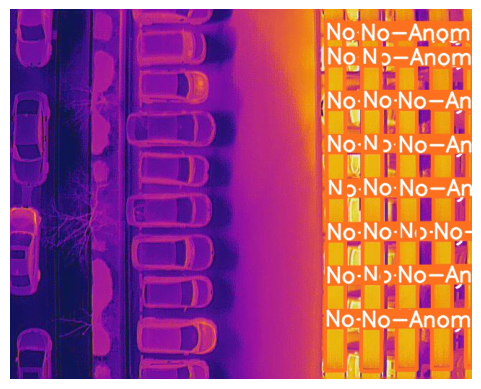

In [7]:
image = Image.open('/root/AT2/Object_detection/yolo/yolov5/runs/detect/exp/100005.jpg')
plt.axis('off')
plt.imshow(image)

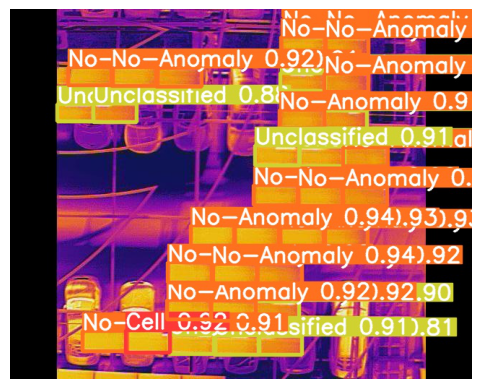

In [8]:
image = Image.open('/root/AT2/Object_detection/yolo/yolov5/runs/detect/exp/100429.jpg')
plt.axis('off')
plt.imshow(image)

## 7. Performance Analysis

#### Training and Validation Metrics Visualization

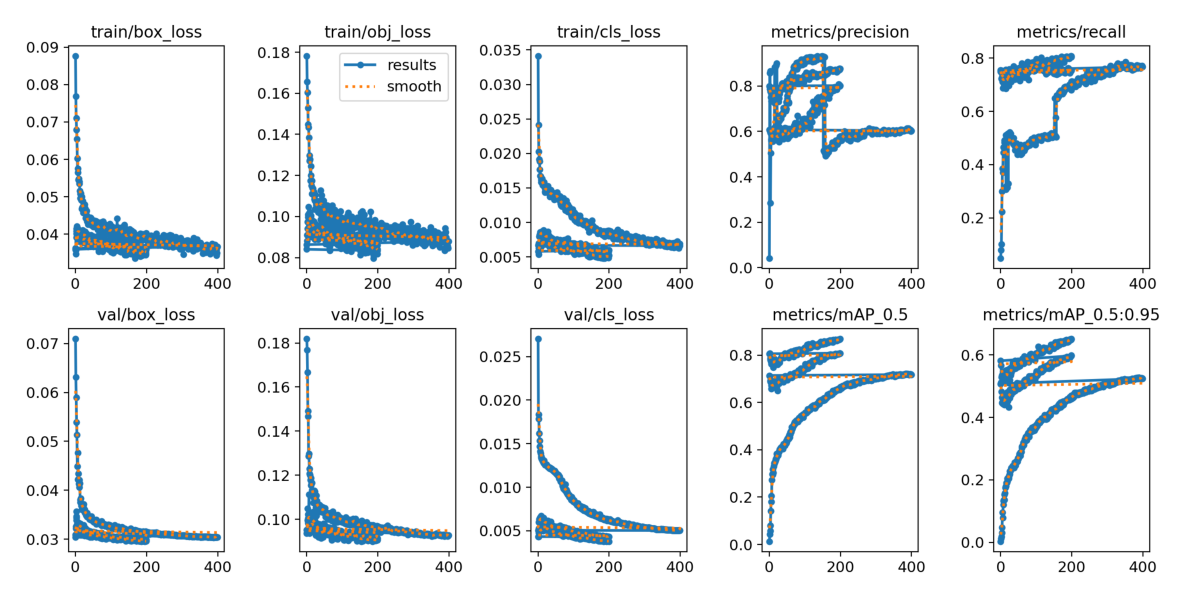

In [9]:
exp_results = Image.open('/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/results.png') 
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(exp_results)

#### Confusion Matrix

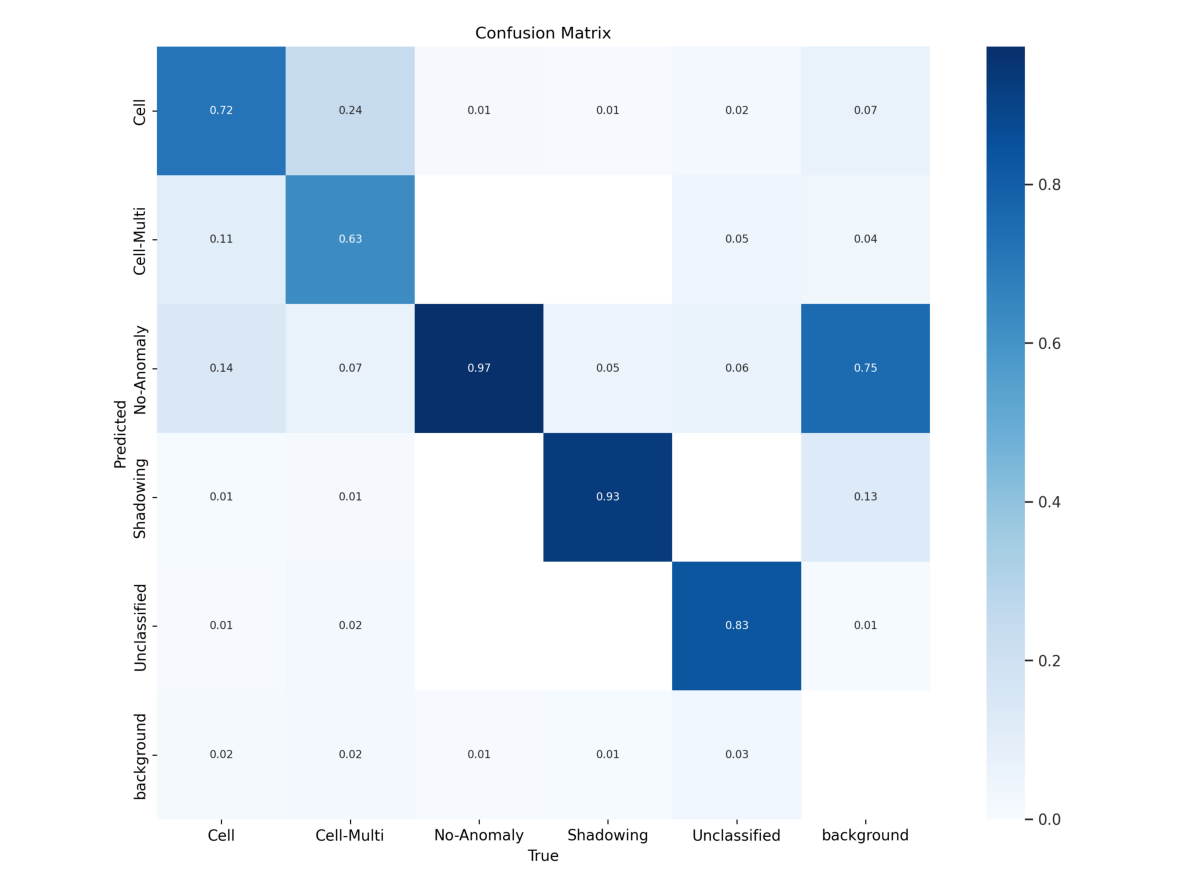

In [10]:
confusion_matrix = Image.open('/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/confusion_matrix.png') # Change 'exp' to the last in the train directory
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(confusion_matrix)

#### Precision-Recall Curve

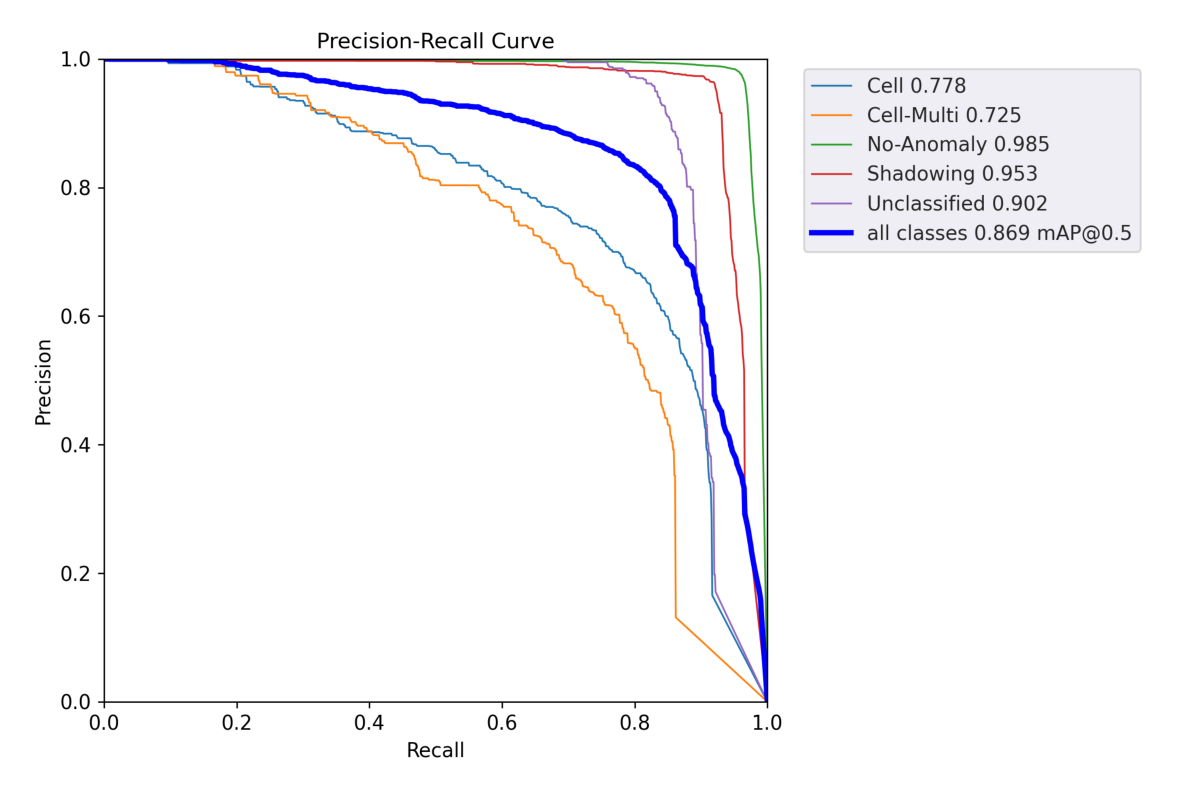

In [11]:
PR_curve = Image.open('/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/PR_curve.png')
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(PR_curve)


#### F1-Confidence Curve

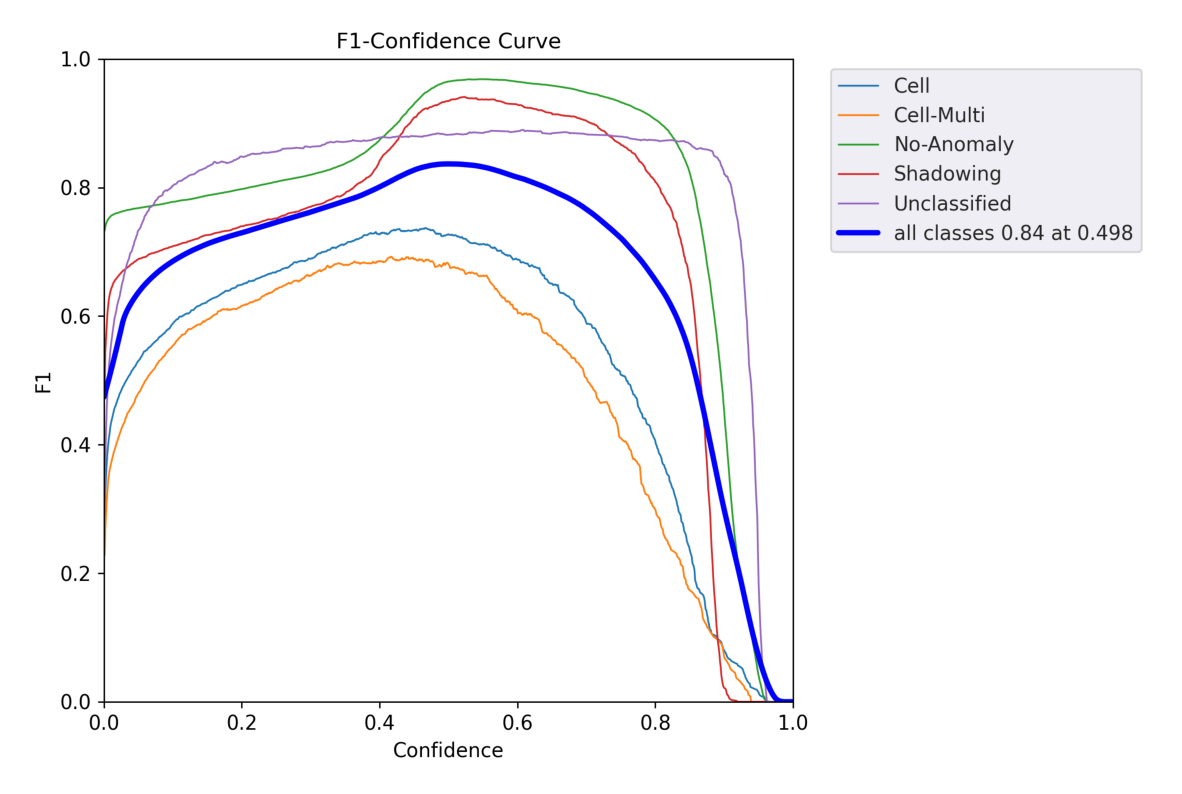

In [12]:
F1_curve = Image.open('/root/AT2/Object_detection/yolo/yolov5/runs/train/exp/F1_curve.png')
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(F1_curve)


From the plots above it is clear that while achieving high precision and recall for 'No-Anomaly' objects, the model struggles with classes such as 'Cell' and 'Cell-Multi, as indicated by their lower precision and recall values. This is due to significant class imbalance. 
The limited number of data samples available for these classes makes it inherently challenging for the models to learn and generalise patterns associated with cell structures effectively. Collecting more diverse and representative data specifically for these classes would be crucial to address this issue.